In [291]:
import pandas as pd
import numpy as np
import plotly
import plotly.offline as py    
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from pandas import Series,DataFrame
import csv
py.init_notebook_mode(connected=True)        #离线使用
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator 
from scipy.misc import imread 
from plotly.offline import iplot
from plotly.graph_objs import Scatter, Layout

In [292]:
df=pd.read_csv('lagousaved.csv',encoding='utf-8')

In [293]:
df.fillna(value='')

,时间,岗位,地点,工资,要求,公司,方向,公司标签,福利待遇
0,1天前发布,Python工程师,成都·锦江区,15k-30k,经验3-5年 / 本科,希望金科,移动互联网 金融 / 不需要融资 / 150-500人\t后端,"六险一金,实力平台,牛人团队,技术氛围好",
1,1天前发布,Python 开发工程师,杭州·古荡,10k-20k,经验1-3年 / 本科,Club Factory,电子商务,移动互联网 / C轮 / 150-500人\t电商,"弹性工作,周末双休"
2,1天前发布,Python研发工程师,北京·太阳宫,17k-24k,经验3-5年 / 本科,听云,"移动互联网 / 上市公司 / 150-500人\t""""",上市公司 带薪年假 地铁周边,
3,3天前发布,python研发工程师,杭州·拱墅区,15k-30k,经验1-3年 / 本科,美登科技,电子商务,企业服务 / 不需要融资 / 15-50人\t后端C,"弹性工作,技术大神带,午餐补助,年度旅游"
4,2天前发布,Python工程师,上海·杨浦区,15k-30k,经验1-3年 / 本科,GeexFinance,金融 / A轮 / 150-500人\t风控,有挑战,
5,1天前发布,Python开发工程师,上海·浦东新区,13k-22k,经验不限 / 本科,妈妈帮,移动互联网,O2O / 不需要融资 / 50-150人\t绩效奖金年底双薪专项奖金五险一金,"氛围活跃,技术团队,不打卡,福利赞"
6,2天前发布,Python开发工程师,郑州·姚寨,5k-10k,经验1-3年 / 大专,郑州创恒实业有限公司,移动互联网 / 未融资 / 150-500人\t后端Node.jsPHP,"周末双休,年底双薪,全勤奖,外出旅游",
7,1天前发布,Python工程师,杭州·西兴,15k-30k,经验3-5年 / 本科,TELETRAAN,数据服务,企业服务 / 天使轮 / 15-50人\t全新MAC24+显示器硅谷工作机会股票期权,"弹性工作,硅谷团队,股权激励,全正版软件"
8,1天前发布,Python开发工程师,北京·西北旺,18k-36k,经验3-5年 / 本科,Aibee,移动互联网,企业服务 / 天使轮 / 50-150人\t后端服务器端客户端,"初创公司,技术驱动"
9,1天前发布,Python开发工程师,深圳·科技园,13k-25k,经验1-3年 / 大专,易博天下,移动互联网,O2O / 上市公司 / 150-500人\t年底双薪股票期权带薪年假创业公司范儿,平台好 高速增长 股票期权 创业团队


## 1.Where are those companies offering Python jobs mostly located in?

In [294]:
df['loc']=df['地点'].apply(lambda x: x.split('·')[0])

In [295]:
number_of_apps_in_category = df['loc'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

It's apparent to see that people who want to become a Python engineer can find a job more easily in Beijing and Shanghai.

## 2.How about the companies benefits package?

In [296]:
all_text = []
df['福利待遇']=df['福利待遇'].apply(lambda x:str(x))
for text in df['福利待遇']:
    all_text.extend(text.split(','))
len(all_text)

295

{'nan': 65, '弹性工作': 9, '周末双休': 3, '技术大神带': 2, '午餐补助': 2, '年度旅游': 2, '氛围活跃': 1, '技术团队': 1, '不打卡': 2, '福利赞': 1, '硅谷团队': 1, '股权激励': 1, '全正版软件': 1, '初创公司': 1, '技术驱动': 1, '平台好 高速增长 股票期权 创业团队': 1, '带薪年假 绩效奖金 满年调薪 交通便利': 1, '技术导向': 1, '扁平管理': 2, '用餐免费': 1, '福利补贴': 1, '竞争力的薪资，弹性工作时间和开放办公环境': 1, '高成长性': 1, '福利好': 2, '上市公司': 4, '公司氛围好': 2, '平台大': 1, '技术牛': 1, '技术大牛': 1, '人工智能；技术驱动；大牛带队；福利多多': 2, '年底双薪 弹性上班': 1, '五险一金': 13, '交通补助': 1, '午晚餐': 1, '五险一金 带薪假 海外旅游 节假福利': 2, '发展前景好': 1, '六险一金': 7, '节日福利': 2, '带薪休假': 2, '餐补': 2, '互联网医疗': 1, '上市背景': 1, '领头企业': 1, '行业大拿': 1, '行业火': 1, '氛围棒': 1, '福利全': 1, '带薪年假': 5, '零食饮料': 1, '年终奖': 3, '境外团结': 1, '弹性工时/年轻团队/人性管理/高端客户群': 1, '技术成长': 1, '晋升空间大': 1, '发挥空间': 1, '团队氛围': 1, '优秀团队': 2, '优秀项目': 1, '住房补贴': 1, '一日三餐': 2, '部门负责人': 1, '核心成员': 1, '年终奖金': 2, '弹性时间': 2, '零食水果': 2, '全球用户': 1, '在线教育': 1, '国际团队': 1, '福利满分': 1, '8天年假': 1, '扁平化管理': 4, '十五薪': 1, '打车补贴': 1, '双月奖金': 1, '发挥空间 晋升空间 牛人多 团队优秀': 1, '出国游': 1, '发展前景好、学习发展快': 1, '数据抓取': 1, 'pytho': 1, '二次医疗': 1, '健身场所':

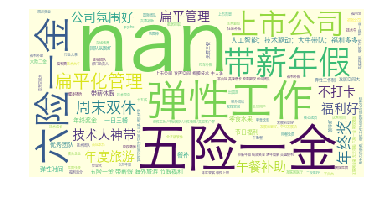

In [297]:
all_text = []
df['福利待遇']=df['福利待遇'].astype(str)
#print(df['福利待遇'])
for text in df['福利待遇']:
    all_text.extend(text.split(','))

word_count = {}        

for word in all_text:
    
    if word not in word_count:
        word_count[word] = 1
    else:
        word_count[word] = word_count[word]+1

print (word_count)
wc = WordCloud(background_color='lightyellow',font_path="/System/Library/Fonts/Hiragino Sans GB.ttc")              
w = wc.generate_from_frequencies(word_count)

plt.imshow(w)
plt.axis('off')                                     
plt.show()  

As the graph above shows, many companies offer benefits including"五险一金", "六险一金", "弹性工作","带薪年假" and so on.

## 3. What is the average salary of Python engineer in every city？

In [298]:
#df['工资']
df['low'] = df['工资'].apply(lambda x:x.split('k')[0])
print (df['low'])
df['low'] = df['low'].apply(lambda x:int(x))
df['high']=df['工资'].apply(lambda x:x.split('k')[1])
df['high'] = df['high'].apply(lambda x:int(x))

0      15
1      10
2      17
3      15
4      15
5      13
6       5
7      15
8      18
9      13
10     15
11     25
12      8
13     10
14      8
15     10
16     15
17     15
18     20
19     10
20     12
21     20
22     20
23     20
24     10
25     10
26     18
27     15
28     13
29      8
       ..
120    20
121    15
122    20
123    10
124    10
125    20
126    25
127    20
128    25
129    15
130    20
131     8
132    15
133     4
134    15
135    25
136    15
137    10
138    15
139    20
140    15
141    10
142    15
143    15
144    25
145    10
146    15
147    15
148    20
149    10
Name: low, Length: 150, dtype: object


In [299]:
# 只留下需要处理的列
#cols = [col for col in df.columns if col in['loc','low']]
g = df.groupby('loc')
g['low'].mean()

#df.loc[df.Category==category]['Rating']

loc
上海    15.205882
东莞    10.000000
北京    18.796296
南京    10.000000
厦门    15.000000
大连     8.000000
天津    10.000000
广州    12.500000
廊坊     8.000000
德阳     6.000000
成都    10.500000
杭州    12.363636
武汉    11.666667
深圳    17.333333
珠海    13.000000
苏州    11.666667
西安    11.000000
郑州     6.000000
长沙     9.333333
Name: low, dtype: float64

In [300]:
data = [go.Bar(
    x=['上海', '东莞', '北京','南京','厦门','大连','天津','广州','廊坊','德阳','成都','杭州','武汉','深圳','珠海','苏州','西安','郑州','长沙'],
    y=[15.205882,10.000000,18.796296,10.000000,15.00000,8.000000,10.000000,12.500000,8.000000, 6.000000,10.500000,12.363636,11.666667,17.333333,13.000000,11.666667,11.000000,6.000000,9.333333,],
    marker=dict(
        color=[ 'rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)',
              'rgba(220,230,185,0.8)', 'rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)','rgba(220,230,185,0.8)'])    
)]
iplot({"data": data,"layout": Layout(title="Average Salary"),})

Job seekers are more likely to get higher salary in Beijing, Shenzhen, Shanghai and Xiamen.